In [41]:
# to enable table format
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

# to disbale table format
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

# !pip install pyLDAvis

In [3]:
# magic interactive shell command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
# for data exploration
import pandas as pd
import numpy as np
import datetime as dt 

# remove warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

# for text processing 
import re
import nltk 

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import string 
string.punctuation

from bs4 import BeautifulSoup
# from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

# gensim for LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from plotly.subplots import make_subplots
import pyLDAvis
# import pyLDAvis.gensim #dont skip this
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# to display all columns ana rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.min_rows',None)
pd.set_option('display.expand_frame_repr',True)

print('Libraries Imported!')



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Libraries Imported!


In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
# upload file locally
# from google.colab import files
# uploaded = files.upload()

# file upload through google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# # read raw data
# dataset = pd.read_csv(io.BytesIO(uploaded['sample_us.tsv'],sep='\t',error_bad_lines=False))
# df = pd.read_csv('/content/sample_us.tsv',sep='\t',error_bad_lines=False)
df = pd.read_csv("drive/MyDrive/datasets/watch_reviews.tsv",sep='\t',error_bad_lines=False)
df.head()
df.shape

b'Skipping line 8704: expected 15 fields, saw 22\nSkipping line 16933: expected 15 fields, saw 22\nSkipping line 23726: expected 15 fields, saw 22\n'
b'Skipping line 85637: expected 15 fields, saw 22\n'
b'Skipping line 132136: expected 15 fields, saw 22\nSkipping line 158070: expected 15 fields, saw 22\nSkipping line 166007: expected 15 fields, saw 22\nSkipping line 171877: expected 15 fields, saw 22\nSkipping line 177756: expected 15 fields, saw 22\nSkipping line 181773: expected 15 fields, saw 22\nSkipping line 191085: expected 15 fields, saw 22\nSkipping line 196273: expected 15 fields, saw 22\nSkipping line 196331: expected 15 fields, saw 22\n'
b'Skipping line 197000: expected 15 fields, saw 22\nSkipping line 197011: expected 15 fields, saw 22\nSkipping line 197432: expected 15 fields, saw 22\nSkipping line 208016: expected 15 fields, saw 22\nSkipping line 214110: expected 15 fields, saw 22\nSkipping line 244328: expected 15 fields, saw 22\nSkipping line 248519: expected 15 fields,

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31


(960204, 15)

In [8]:
df[['product_title','review_body','product_category']].head()

,product_title,review_body,product_category
0,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Absolutely love this watch! Get compliments al...,Watches
1,Kenneth Cole New York Women's KC4944 Automatic...,I love this watch it keeps time wonderfully.,Watches
2,Ritche 22mm Black Stainless Steel Bracelet Wat...,Scratches,Watches
3,Citizen Men's BM8180-03E Eco-Drive Stainless S...,"It works well on me. However, I found cheaper ...",Watches
4,Orient ER27009B Men's Symphony Automatic Stain...,Beautiful watch face. The band looks nice all...,Watches


In [9]:
# check for time range of dataset
time_range=pd.Series(pd.to_datetime((df.review_date.sort_values(ascending=False)))).dropna()
time_diff=(time_range.iloc[0]-time_range.iloc[-1])
print(f'The dataset has a time period from {time_range.iloc[-1].year} to {time_range.iloc[0].year}, in total of {time_diff}.')

The dataset has a time period from 2001 to 2015, in total of 5261 days 00:00:00.


In [10]:
# check dataset size and number of features
print(f"Dataset contians {df.shape[0]} rows and {df.shape[1]} columns")

Dataset contians 960204 rows and 15 columns


In [11]:
# convert review body column to string datatype
df['review_body'] = df['review_body'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960204 entries, 0 to 960203
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        960204 non-null  object
 1   customer_id        960204 non-null  int64 
 2   review_id          960204 non-null  object
 3   product_id         960204 non-null  object
 4   product_parent     960204 non-null  int64 
 5   product_title      960202 non-null  object
 6   product_category   960204 non-null  object
 7   star_rating        960204 non-null  int64 
 8   helpful_votes      960204 non-null  int64 
 9   total_votes        960204 non-null  int64 
 10  vine               960204 non-null  object
 11  verified_purchase  960204 non-null  object
 12  review_headline    960197 non-null  object
 13  review_body        960204 non-null  object
 14  review_date        960200 non-null  object
dtypes: int64(5), object(10)
memory usage: 109.9+ MB


**Building Up Text Corpus**

In [12]:
# filter() --> use to filter data from the dataset
# finding missing values
df['review_id'].isnull().sum()


0

Considering only those popular products which have more than 300 reviews 

In [13]:
# finding popular products using group by and filtering data where reviews > 300
popular_products = df.groupby(df['product_id']).filter(lambda x: x['review_id'].count()>=300)
print(f'Number of datapoints matching the criteria is: {len(popular_products)}')
data = pd.DataFrame(popular_products)
# check null values for the new dataset
popular_products.isnull().sum()

Number of datapoints matching the criteria is: 132407


marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

**Text Preprocessing**

**Text preprocessing/cleaning steps:**
Lower Casing
The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.
Pros: More helpful for text featurization like frequency, TF-IDF as it reducing the duplicates.
Cons: May not be helpful in sentiment analysis when upper cases often refers to anger.


**Removal of Punctuation**
The string.punctuation in Python contains the following punctuations:
!"#$%&'()*+,-./:;<=>?@[\]^_{|}~`


Removal of Stopwords **bold text**
The commonly occuring words in a language that doesn't provides valuable information.


Stemming **bold text**
Convert words to it's word stem, base or root. Porter Stemmer is for English language. If we are working with other languages, we can use snowball stemmer.


Lemmatization **bold text**
Convert the word to it's original form based on its context, slower but more linguistic revalent.
NLTK, Stanford, Bitext Lemmatizer available.


**Removal of emojis**
For social media text corpuses, an explosion usage of emoji should also be taken care of. Functions credit to this repo.
For sentiment analysis or similar purposes, the emotion delivered from emojis are unnegligible, and thanks to this repo, we can make use this dictionary to conver the emojis to corresponding words.
For this project's purposes, since the data ends in 2015 and not as abundant emojis are available by then, we can skip this part of preprocessing.


**Removal of URLs**
When doing Twitter/Reddit analysis, there's good chance of having URLs present in data, we might need to remove it for analysis.


Removal of HTML tags
When data is scrapped from websites, we might end up having html strings as part of the text. Can remove it by using Regex or a more elegant way of using BeautifulSoup.

Stemming

In [14]:
def clean_text_stemming(var):
    """
    Function for text preprocessing with Poter Stemming.
    """
    sw = set(stopwords.words('english'))
    ps = PorterStemmer() 

    # tokenize the word using nltk  
    my_text = nltk.word_tokenize(var)
    
    # remove not english characters, lower case and remove the white space at end 
    my_text = re.sub('[^A-Za-z0-9]+', " ", var).lower().strip()

    # remove the stop words 
    my_text = [word for word in my_text.split() if word not in sw]

    # stemming
    my_text = [ps.stem(word) for word in my_text]

    # removal of URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    my_text = url_pattern.sub(r'', ' '.join(my_text))

    # removal of HTML Tags
    my_text = BeautifulSoup(my_text, "lxml").text

    # convert the text to list as the vectorized words  
    my_text = my_text.split(" ")
    
    return my_text

In [15]:
a = data['review_body'][50:60]
a.apply(lambda x: clean_text_stemming(x))

375                [love, comfort, feel, weak, bracelet]
377                                       [excel, watch]
382          [exactli, need, want, awesom, great, price]
398    [seem, cheap, watch, accur, time, keep, possib...
400    [ok, watch, day, easili, say, best, cheapli, p...
409      [excel, son, love, want, swim, yet, pass, test]
450                                       [pretti, good]
453    [great, watch, great, water, resist, substanti...
497                                         [niec, love]
513    [recommend, watch, high, qualiti, perform, adv...
Name: review_body, dtype: object

Lemmatization

In [16]:
def clean_text_lemma(var):
    """
    Function for text preprocessing with Lemmatizing with POS tag.
    """
    sw = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    wordnet_map = {"N": wordnet.NOUN,"V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
    
    # tokenize the word using nltk  
    my_text = nltk.word_tokenize(var)
    
    # remove not english characters, lower case and split the text 
    my_text = re.sub('[^A-Za-z0-9]+', " ", var).lower().strip() 

    # remove the stop words 
    my_text = [word for word in my_text.split() if word not in sw]

    # lemmatizing 
    pos_tagged_text = nltk.pos_tag(my_text) 
    my_text = " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

    # removal of URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    my_text = url_pattern.sub(r'', my_text)

    # removal of HTML Tags
    my_text = BeautifulSoup(my_text, "lxml").text

    # convert the text to list as the vectorized words  
    my_text = my_text.split(" ")

    return my_text

In [17]:
b = data['review_body'][50:60]
b.apply(lambda var: clean_text_lemma(var))

375            [love, comfortable, feel, weak, bracelet]
377                                   [excellent, watch]
382         [exactly, need, want, awesome, great, price]
398    [seem, cheap, watch, accurate, time, keep, pos...
400    [ok, watch, day, easily, say, best, cheaply, p...
409    [excellent, son, love, want, swim, yet, pass, ...
450                                       [pretty, good]
453    [great, watch, great, water, resistance, subst...
497                                        [niece, love]
513    [recommend, watch, high, quality, perform, adv...
Name: review_body, dtype: object

TF-IDF Tokenization

In [18]:
tfidf_model = TfidfVectorizer(max_df=0.99,
                max_features=1000,
                min_df = 0.01,
                stop_words='english',
                use_idf=True,
                tokenizer=clean_text_lemma,
                ngram_range=(1,3))

tfidf_matrix = tfidf_model.fit_transform(data['review_body'])
print(f"In total there are {tfidf_matrix.shape[0]} review and {tfidf_matrix.shape[1]} terms")



In total there are 132407 review and 386 terms


In [19]:
# save the terms identified by TF-IDF and have a look 
tf_selected_words = tfidf_model.get_feature_names_out()

# print out word snippet 
tf_selected_words[380:]

array(['wrist', 'wrong', 'year', 'year ago', 'year old', 'zone'],
      dtype=object)

In [20]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.26266533,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Now as the text has been transformed into numbers in a way that machine learning algorithm can understand, which is the process as text vectorization, we can feed the TF-IDF score to algorithms for more interesting exploration.

**Part 3: Topic Modeling**


Both K-means and Latent Dirichlet Allocation (LDA) are unsupervised learning algorithms, where the user needs to decide a priori the parameter K, respectively the number of clusters and the number of topics.

If both are applied to assign K topics to a set of N documents, the most evident difference is that K-means is going to partition the N documents in K disjoint clusters (i.e. topics in this case).

On the other hand, LDA assigns a document to a mixture of topics. Therefore each document is characterized by one or more topics (e.g. Document D belongs for 60% to Topic A, 30% to topic B and 10% to topic E). Hence, LDA can give more realistic results than k-means for topic assignment. 

K-Means Clustering

In [21]:
from sklearn.cluster import KMeans

# initialize with 5 clusters
num_clusters = 5
km = KMeans(n_clusters=num_clusters).fit(tfidf_matrix)
clusters = km.labels_.tolist()

Analyze K-means Result

In [22]:
# create DataFrame films from all of the input files.
product = { 'review': data['review_body'], 'cluster': clusters}
frame = pd.DataFrame(product, columns = ['review', 'cluster'])
frame.head(10)

,review,cluster
2,Scratches,2
3,"It works well on me. However, I found cheaper ...",2
26,It works well with nice simple look.,2
29,This watch is a very beautiful time piece. Thi...,4
34,Awesome watch for the price,2
38,This is now my everyday watch. Easy to read w...,0
44,"Have worn it constantly, love the light at night",0
46,Great product . Love the continous innovation ...,2
57,"Alrighty, after seeking out the ultimate low-p...",4
65,"Man watch for woman, just a right size and des...",2


In [23]:
print ("Number of reviews included in each cluster:")
frame['cluster'].value_counts().to_frame()

Number of reviews included in each cluster:


,cluster
2,87727
3,15575
0,12132
4,11732
1,5241


In [24]:
km.cluster_centers_.shape

(5, 386)

In [28]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
order_centroids

array([[196, 197, 338, ...,  50,  49, 341],
       [137, 246, 142, ..., 341, 265, 383],
       [338, 321, 181, ..., 340,  50, 341],
       [143, 338, 146, ...,  49,  50, 341],
       [ 48,  49, 338, ..., 139, 349,  84]])

The assumption underpins is that using the cluster_center_ to represent the whole cluster, and the higher the TF-IDF value is, the higher representation power of this word is. Therefore, I choose the top 6 words according to their TF-IDF score to represent it's cluster. And see if there's some pattern that we can find from it's clustering result.

In [26]:
# sort it in decreasing-order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

Cluster_keywords_summary = {}
for i in range(num_clusters):
    print ("Cluster " + str(i) + " words:", end='')
    Cluster_keywords_summary[i] = []
    for j in order_centroids[i, :6]: # replace 6 with n words per cluster
        Cluster_keywords_summary[i].append(tf_selected_words[j]) # tf_selected_words is a list of the selected words from the text data and is used to retrieve the actual keyword based on the sorted indices from order_centroids
        print (tf_selected_words[j] + ",", end='')
    print ()
    
    cluster_reviews = frame[frame.cluster==i].review.tolist()
    print ("Cluster " + str(i) + " reviews (" + str(len(cluster_reviews)) + " reviews)")
    print ()

Cluster 0 words:love,love watch,watch,gift,buy,husband,
Cluster 0 reviews (12132 reviews)

Cluster 1 words:good,product,good watch,watch,price,good price,
Cluster 1 reviews (5241 reviews)

Cluster 2 words:watch,time,like,nice,look,work,
Cluster 2 reviews (87727 reviews)

Cluster 3 words:great,watch,great watch,price,look,work,
Cluster 3 reviews (15575 reviews)

Cluster 4 words:br,br br,watch,time,look,band,
Cluster 4 reviews (11732 reviews)



Analysis for the K-means clustering results:

From the above clustering results, we can see that the word watch is showing up in each ranking, which is not surprising but redundant this case, for the model imporvement, we could add this domain related word into the stopwords.

Most reviews fell into the cluster 5 with a ratio of 66.24%, yet the tokenized word from it is not so informative, as it just praising the punctuality of the watch.


Business Insight

Cluster 0 though, with the words like love, gift, husband gathering, we can infer that this watch have being giving out as present to the customer's spouse and as a way of showing their affection. I would suggest the brand to have some promotion activities when it comes to Vlentine's Day, and can run an A/B test on whether the promotion would help increase the sales.

**Latent Dirichlet Allocation(LDA)**

Gensim's LDA requires the data in a certain format. Firstly, it needs the corpus as a dicionary of id-word mapping, where each word has a unique numeric ID. This is for computationally efficiency purposes. Secondly, it needs the corpus as a term-document frequency matrix which contains the frequency of each word in each document

Create the dictionary and corpus needed for Topic Modeling

In [29]:
# process all the data using lemmatization
data_lemmatized = data['review_body'].apply(lambda x: clean_text_lemma(x))

In [30]:
# create dictionary
id2word=corpora.Dictionary(data_lemmatized)

#create corpus with Term Document Frequency
corpus=[id2word.doc2bow(text) for text in data_lemmatized]

# sample
print(corpus[2])

[(8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


Gensim creates a unique id for each word in the document, the produced corpus shown above is a mapping of (word_id, word_frequency).
For instance, (8,1) above implies, word id 8 occurs once in the first document. And this will be used as the input by the LDA model of Gensim.

In [32]:
# human-readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('scratch', 1)]]

Let's now build the topic model with LDA. We'll define 5 topics to start with. The hyperparameter alpha affects sparsity of the document-topic (theta) distributions, whose default value is 1. Similarly, the hyperparameter eta can also be specified, which affects the topic-word distribution's sparsity.
chunksize is the number of documents to be used in each training chunk. update_every determines how often the model parameters should be updated and passes is the total number of training passes.

Build the model and view the topics

In [33]:
# Build LDA model
lda_model= gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = id2word,
                                           num_topics = 5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

The above LDA model is built with 5 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic. We can see the keywords for each topic and the importance(weight) of each keyword using lda_model.print_topics() as shown next.

In [34]:
# print the 5 topics
lda_model.print_topics()

[(0,
  '0.091*"good" + 0.081*"work" + 0.054*"love" + 0.036*"tool" + 0.027*"recommend" + 0.026*"quality" + 0.025*"product" + 0.022*"perfect" + 0.018*"stop" + 0.015*"excellent"'),
 (1,
  '0.111*"br" + 0.036*"light" + 0.030*"feature" + 0.027*"casio" + 0.025*"hand" + 0.024*"alarm" + 0.018*"button" + 0.015*"digital" + 0.014*"water" + 0.013*"g"'),
 (2,
  '0.093*"time" + 0.032*"day" + 0.029*"battery" + 0.027*"set" + 0.023*"keep" + 0.017*"date" + 0.014*"3" + 0.014*"need" + 0.013*"change" + 0.012*"clock"'),
 (3,
  '0.038*"one" + 0.022*"year" + 0.016*"use" + 0.015*"get" + 0.014*"take" + 0.014*"band" + 0.012*"still" + 0.011*"go" + 0.011*"first" + 0.010*"back"'),
 (4,
  '0.154*"watch" + 0.031*"look" + 0.023*"like" + 0.023*"great" + 0.019*"band" + 0.017*"buy" + 0.016*"wear" + 0.015*"well" + 0.015*"price" + 0.014*"easy"')]

Model evaluation and visualization
Finally we'd like to evalue how good a given model is, and normally we'd reference to coherence score.

In [35]:
# compute perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# compute coherence score
coherence_model_lda=CoherenceModel(model=lda_model,texts=data_lemmatized,dictionary=id2word,coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print('\nCoherence Score:',coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -6.953809230298145

Coherence Score: 0.4743876503514671


In [36]:
# visulaise the topics
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model,corpus,id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.244492  0.000478       1        1  37.504552
3     -0.213162  0.073863       2        1  26.106421
2      0.022866 -0.360004       3        1  14.827846
1      0.077902  0.279069       4        1  12.772619
0      0.356886  0.006595       5        1   8.788562, topic_info=             Term           Freq          Total Category  logprob  loglift
68          watch  192871.000000  192871.000000  Default  30.0000  30.0000
21             br   47289.000000   47289.000000  Default  29.0000  29.0000
65           time   45877.000000   45877.000000  Default  28.0000  28.0000
36           good   26809.000000   26809.000000  Default  27.0000  27.0000
9            work   23858.000000   23858.000000  Default  26.0000  26.0000
46            one   33399.000000   33399.000000  Default  25.0000  25.0000
81           love   15988.000000   15988.000000  Default  24.0000  24.0000
10           look   39431.000000   39431.000000  Default  23.0000  23.0000
79          light   15231.000000   15231.000000  Default  22.0000  22.0000
124           day   16013.000000   16013.000000  Default  21.0000  21.0000
133          like   29175.000000   29175.000000  Default  20.0000  20.0000
103         great   28495.000000   28495.000000  Default  19.0000  19.0000
91        battery   14450.000000   14450.000000  Default  18.0000  18.0000
31        feature   12793.000000   12793.000000  Default  17.0000  17.0000
151          year   19462.000000   19462.000000  Default  16.0000  16.0000
538          tool   10478.000000   10478.000000  Default  15.0000  15.0000
251           set   13253.000000   13253.000000  Default  14.0000  14.0000
509         casio   11461.000000   11461.000000  Default  13.0000  13.0000
498          hand   10644.000000   10644.000000  Default  12.0000  12.0000
131          keep   11383.000000   11383.000000  Default  11.0000  11.0000
363         alarm   10127.000000   10127.000000  Default  10.0000  10.0000
171     recommend    8035.000000    8035.000000  Default   9.0000   9.0000
85           wear   19640.000000   19640.000000  Default   8.0000   8.0000
8            well   18747.000000   18747.000000  Default   7.0000   7.0000
319       quality    7531.000000    7531.000000  Default   6.0000   6.0000
6           price   18676.000000   18676.000000  Default   5.0000   5.0000
109       product    7251.000000    7251.000000  Default   4.0000   4.0000
76           easy   17784.000000   17784.000000  Default   3.0000   3.0000
61           take   12459.000000   12459.000000  Default   2.0000   2.0000
19           band   35534.000000   35534.000000  Default   1.0000   1.0000
68          watch  192870.815970  192871.255554   Topic1  -1.8713   0.9807
10           look   39430.807868   39431.246046   Topic1  -3.4588   0.9807
133          like   29175.458172   29175.897441   Topic1  -3.7600   0.9807
103         great   28494.870990   28495.309771   Topic1  -3.7836   0.9807
85           wear   19639.596158   19640.034677   Topic1  -4.1558   0.9807
8            well   18747.152149   18747.591767   Topic1  -4.2023   0.9807
6           price   18675.879302   18676.317265   Topic1  -4.2061   0.9807
76           easy   17783.757383   17784.197997   Topic1  -4.2550   0.9807
71          wrist   14683.697809   14684.135738   Topic1  -4.4466   0.9807
11           nice   13888.734945   13889.173212   Topic1  -4.5023   0.9807
170        really   13867.464188   13867.902977   Topic1  -4.5038   0.9807
208          face   12141.073959   12141.513206   Topic1  -4.6367   0.9807
2            find   10999.642951   11000.083242   Topic1  -4.7355   0.9807
157        little   10848.000558   10848.439588   Topic1  -4.7494   0.9807
271         small   10740.757528   10741.195403   Topic1  -4.7593   0.9807
136          much   10471.147453   10471.586775   Topic1  -4.7847   0.9807
156           big    8521.595166    8522.032922   Topi

From the pyLDAvis's output, we can see that each bubble on the left hand side represents a topic, and the larger the bubble, the more prevalent is that topic. Normally, a good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart. Given our prior knowledge of the number of natural topics in the document, finding the best model was fairly straightforward, as now it seems that two bubbles on the left are largely overlapped.

**Hyperparameter Tuning: Number of Topics and Alpha**


The below compute_coherence_values() trains multiple LDA models and provides the models and their corresponding coherence scores.


alpha is a parameter that controls the prior distribution over topic weights in each document, while eta is a parameter for the prior distribution over word weights in each topic. In gensim, both default to a symmetric, 1 / num_topics prior.


These two parameters can be thought of as smoothing parameters when we compute how much each document "likes" a topic (in the case of alpha) or how much each topic "likes" a word (in the case of eta). A higher alpha makes the document preferences "smoother" over topics, and a higher eta makes the topic preferences "smoother" over words.


Since we only have one document for this assignment, we'll focus on alpha for hyperparameter tuning.

In [37]:
def compute_coherence_values(dictionary, corpus, texts, num_topics_range,alpha_range):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    num_topics_range: A list of topics range 
    alpha_range: A list of alpha range

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, alpha=alpha,num_topics=num_topics,\
                                                      per_word_topics=True)
            model_list.append(model)
            coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))

    return model_list, coherence_values

In [38]:
# build models accross a range of num_topics and alpha(this takes a long time)
num_topics_range= [2,3,5,10]

# 1 --> high, 0.1 --> original, 0.01 --> low 
alpha_range=[0.01,0.1,1]
model_list, coherence_values= compute_coherence_values(dictionary=id2word,corpus=corpus,texts=data_lemmatized,\
                                                       num_topics_range=num_topics_range,alpha_range=alpha_range)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [39]:
# change the presentation into dataframe format 
coherence_df = pd.DataFrame(coherence_values, columns=['alpha','num_topics','coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.01,2,0.400658
1,0.01,3,0.427330
2,0.01,5,0.422166
3,0.01,10,0.478156
4,0.10,2,0.409001
5,0.10,3,0.424058
6,0.10,5,0.409680
7,0.10,10,0.476666
8,1.00,2,0.420602
9,1.00,3,0.453271


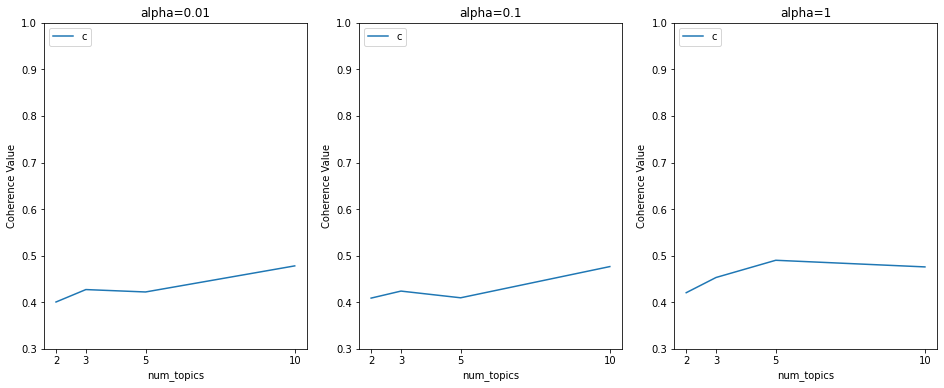

In [40]:
def plot_coherence(coherence_df,alpha_range,num_topics_range):
    """
    Came up with the plots that shows the change of coherence score given different combination of alpha and number of topics. 
    """
    plt.figure(figsize=(16,6))
    for i,val in enumerate(alpha_range):
        # index is the index of alpha 
        plt.subplot(1,3,i+1)
        alpha_subset=coherence_df[coherence_df['alpha']==val]
        plt.plot(alpha_subset['num_topics'],alpha_subset['coherence_value'])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title('alpha={0}'.format(val))
        plt.ylim([0.30,1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df,alpha_range,num_topics_range)

Analysis for the Optimal Number of Topics

From the above subplots, we can see that when setting alpha as 0.01, we reaches the highest coherence value at the number of topic being 5, when alpha being set as 0.1, the optimal number of topics is 3, while when alpha being 1, the coherence value is showing a slightly upwards patteren without a turning point. This is likely because when the alpha is going higher, the weight is much more evenly distributed across the topics.

In combination with the previous viz of LDA result, we would go with the defalut alpha(0.1) and choose 3 as number of topic.